In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing neccessary libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVC

In [3]:
#target values
categories = ['parasitized', 'uninfected']

In [4]:
#A container for fetures and their target values
data = []

In [5]:
#File path
dir = '/content/drive/MyDrive/cell_images/cell_images/train'

In [6]:

#Read in data, resize and flatten

In [7]:
for category in categories:
  path = os.path.join(dir, category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    cell_image = cv2.imread(imgpath, 1)
    try:
      cell_image = cv2.resize(cell_image,(130, 130))
      image = np.array(cell_image).flatten()
      data.append([image, label])
    except Exception as e:
      pass


In [8]:
#Check to see how many trainning examples we have
print(len(data))

24958


In [9]:
#save data to avoid repeating above steps if you choose not to
import pickle

In [10]:

pick_in = open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [11]:
#load data
pick_in = open('data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [12]:
#Array of features and labels
random.shuffle(data)
features = []
labels = []

In [13]:
#Putting features and lables in the array
for feature, label in data:
  features.append(feature)
  labels.append(label)

In [14]:
#create an instance of the support vector classifier
model = SVC()

In [15]:
#Train it!
model.fit(features, labels)


SVC()

In [16]:
#importing some more libraries
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns


In [17]:
#we will now test the efficiency of our model on the test data that it has not seen before

In [18]:
categories2 = ['parasitized', 'uninfected']

In [19]:
data2 = []

In [20]:
dir2 = '/content/drive/MyDrive/cell_images/cell_images/test'

In [21]:
for category in categories2:
  path = os.path.join(dir2, category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    cell_image = cv2.imread(imgpath, 1)
    try:
      cell_image = cv2.resize(cell_image,(130, 130))
      image = np.array(cell_image).flatten()
      data2.append([image, label])
    except Exception as e:
      pass

In [22]:
print(len(data2))

2600


In [23]:
features2 = []
labels2 = []

In [24]:
for feature, label in data2:
  features2.append(feature)
  labels2.append(label)

In [25]:
prediction2 = model.predict(features2)

In [26]:
accuracy2 = model.score(features2, labels2)

In [27]:
print(accuracy2)


0.7261538461538461


In [28]:
print(classification_report(labels2,prediction2))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1300
           1       0.73      0.72      0.72      1300

    accuracy                           0.73      2600
   macro avg       0.73      0.73      0.73      2600
weighted avg       0.73      0.73      0.73      2600



In [29]:
cm2 =confusion_matrix(labels2,prediction2)

In [30]:
print(cm2)

[[953 347]
 [365 935]]


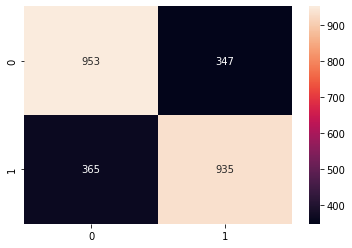

In [31]:
sns.heatmap(cm2, annot=True, fmt='g')